## **Step 1: Install TensorFlow**

In [23]:
!pip install tensorfloW

## **Step 2: Import libraries**

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

## **Step 3: Load and preprocess the CIFAR-10 dataset**

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 2s 0us/step


## **Step 4: Visualizing the CIFAR-10 dataset**

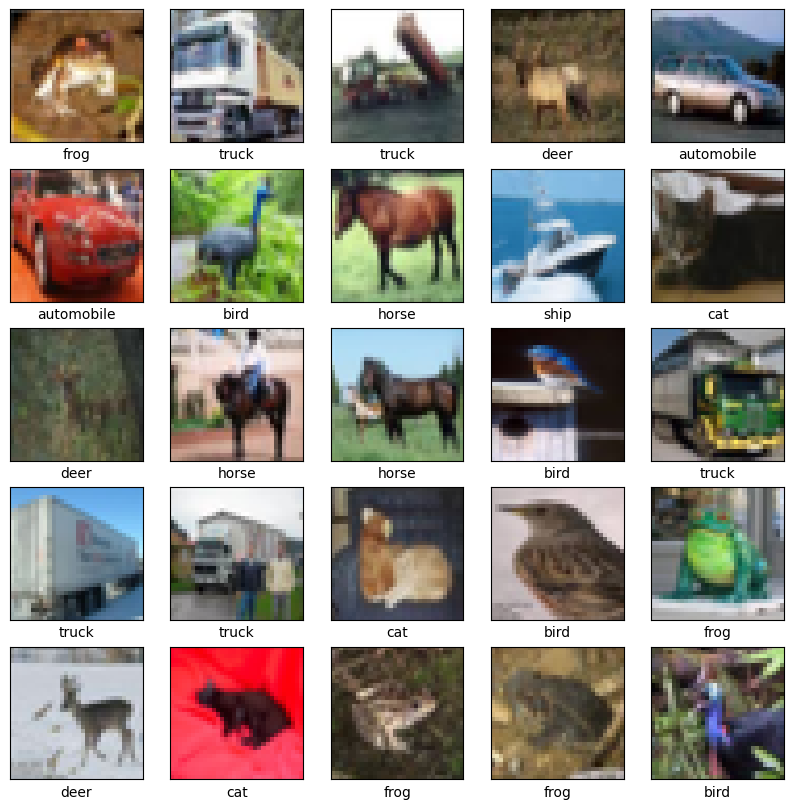

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


## **Step 5: Building the CNN model**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


## **Step 6: Compiling the model**

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Step 7: Training the model**

In [8]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.5238 - accuracy: 0.4421 - val_loss: 1.2387 - val_accuracy: 0.5516
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1347 - accuracy: 0.5964 - val_loss: 1.0824 - val_accuracy: 0.6219
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9853 - accuracy: 0.6546 - val_loss: 1.0265 - val_accuracy: 0.6386
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8918 - accuracy: 0.6872 - val_loss: 0.9383 - val_accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8189 - accuracy: 0.7131 - val_loss: 0.8985 - val_accuracy: 0.6856
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7624 - accuracy: 0.7318 - val_loss: 0.9098 - val_accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7156 - accuracy: 0.7487 - val_loss: 0.8926 -

## **Step 8: Evaluation of the model**

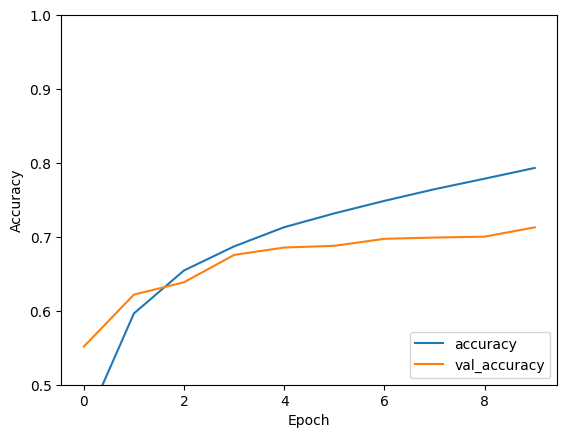

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## **Step 9: Save the model**

In [10]:
model.save('cifar10_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Step 10: Load the saved model**

In [12]:
model = tf.keras.models.load_model('cifar10_model.h5')

## **Step 11: Making predictions**

In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 17ms/step


## **Step 12: Display the predictions**

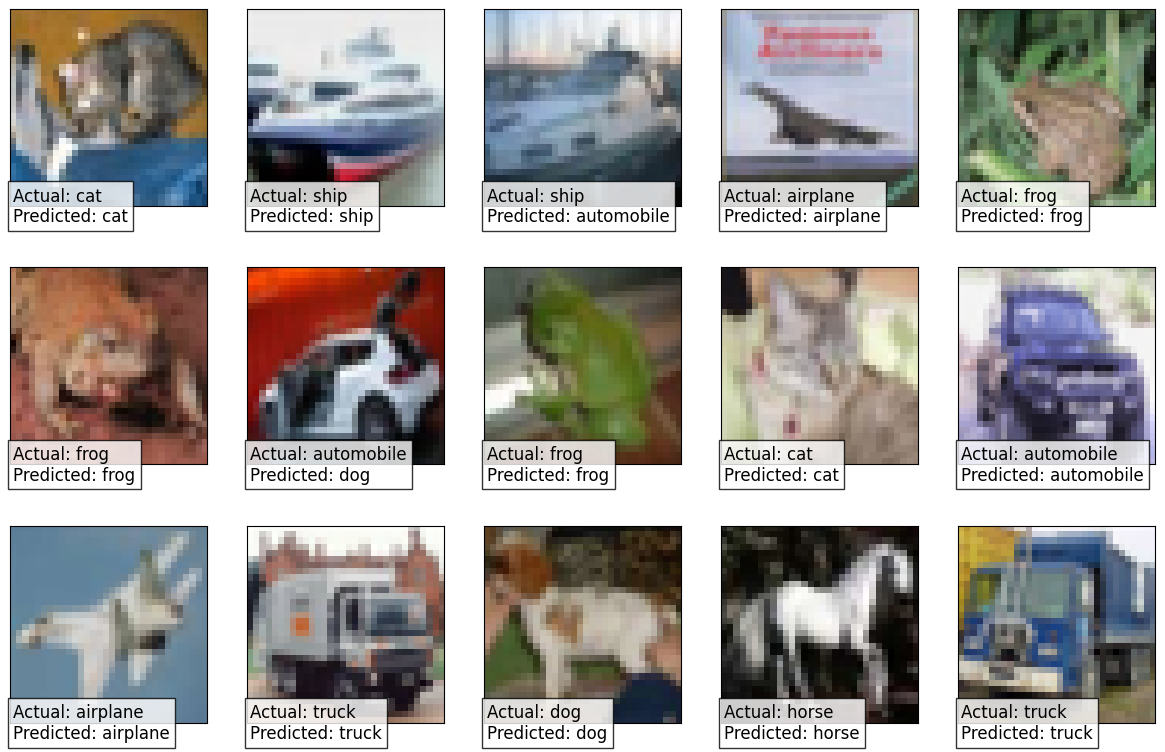

In [22]:
plt.figure(figsize=(12,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.text(0, 34, f"Actual: {class_names[test_labels[i][0]]}\nPredicted: {class_names[np.argmax(predictions[i])]}",
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

## **Step 13: Accuracy Testing**

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 4s - loss: 0.8729 - accuracy: 0.7129 - 4s/epoch - 13ms/step
Test accuracy: 0.7128999829292297
